In [1]:
from keras.layers import Conv2D,MaxPool2D,Dense,GlobalAveragePooling2D,Dropout
from keras.models import Sequential
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
import tensorflowjs as tfjs

Using TensorFlow backend.


ModuleNotFoundError: No module named 'matplotlib'

In [2]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
(X_train.shape,X_test.shape)

((60000, 28, 28), (10000, 28, 28))

In [0]:
_X_train = np.expand_dims(X_train,axis=3)
_X_test = np.expand_dims(X_test,axis=3)

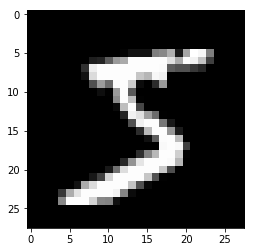

In [5]:
plt.imshow(X_train[0],cmap='gray')

In [0]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [7]:
(y_train_cat.shape,y_test_cat.shape)

((60000, 10), (10000, 10))

In [8]:
model = Sequential()
model.add(Conv2D(input_shape=_X_train[0].shape,filters=32,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.4))
model.add(GlobalAveragePooling2D())
model.add(Dense(10,activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
best_model = ModelCheckpoint('best_model.hdf5', save_best_only=True)
history = model.fit(_X_train,y_train_cat,validation_data=(_X_test,y_test_cat),epochs=50,callbacks=[best_model])

In [0]:
model.load_weights('best_model.hdf5')

In [17]:
model.evaluate(_X_test,y_test_cat)

10000/10000 [==============================] - 0s 38us/step


[0.04988419997650199, 0.9842]

In [0]:
model = Sequential()
model.lo